In [1]:
from ctypes import *
import os
import numpy as np

In [2]:
lib = CDLL([directory])

In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

option = 5 #1 to 9
bitwidth = 4 # largura da palavra
quantity = pow(2,bitwidth)-1

if option < 5:
    inicial_seed = 0
    final_seed = pow(2, bitwidth)-1
    inicial_number = 0
    final_number = pow(2, bitwidth)-1
else:
    inicial_seed = -pow(2, bitwidth-1)
    final_seed = pow(2, bitwidth-1)-1
    inicial_number = -pow(2, bitwidth-1)
    final_number = pow(2, bitwidth-1)-1

errors_ab_mean = np.zeros((quantity,quantity))
errors_ab_max = np.zeros((quantity,quantity))
mean_result = np.zeros((quantity,quantity))

for ia in range(inicial_number, final_number, 1):
    for ib in range(inicial_number, final_number, 1):
        res_mean = 0
        total_error = 0
        max_error = 0
        for seed in range(inicial_seed, final_seed, 1): #using all seeds
            if(seed != 0 and option >= 5) or (option <= 4):

                if option == 1:
                    Y = lib.unipolar_mac(ia, ib, seed, bitwidth);
                elif option == 2:
                    Y = lib.unipolar_dif(ia, ib);
                elif option == 3:
                    Y = lib.unipolar_max(ia, ib);
                elif option == 4:
                    Y = lib.unipolar_mean(ia, ib, seed, bitwidth);
                elif option == 5:
                    Y = lib.bipolar_mac(ia, ib, seed, bitwidth);
                elif option == 6:
                    Y = lib.bipolar_dif(ia, ib, bitwidth);
                elif option == 7:
                    Y = lib.bipolar_max(ia, ib, bitwidth);
                elif option == 8:
                    Y = lib.bipolar_mean(ia, ib, seed, bitwidth);
                else:
                    Y = lib.sign_mag_mac(ia, ib, seed, bitwidth);
                
                expected_value = lib.expected_value
                expected_value.restype = c_float   
            
                scale = lib.scale
                scale.restype = c_float  
                
                expec_val = expected_value(option,c_int(ia),c_int(ib),bitwidth)
                generated_value = scale(option,c_int(Y),bitwidth)
                
                generated_error = np.abs(expec_val - generated_value) 
                
                if(generated_error > max_error):
                    max_error = generated_error
        
                res_mean = res_mean+generated_value
                total_error = total_error + generated_error     
        
        if(option < 5):
            posA = ia
            posB = ib
            qtd_seed = pow(2, bitwidth) 
        else:
            posA = ia+pow(2, bitwidth-1)
            posB = ib+pow(2, bitwidth-1)
            qtd_seed = pow(2, bitwidth) - 1
        
        res_mean = res_mean/qtd_seed
        mean_error = total_error/qtd_seed                
        errors_ab_mean[posA, posB] = mean_error  
        errors_ab_max[posA, posB] = max_error
        mean_result[posA, posB] = res_mean
           

In [4]:
# using datetime module
import datetime;
  
# ct stores current time
ct = datetime.datetime.now()
print("current time:-", ct)

mean_error_operation = "operation"+str(bitwidth)+"_bits_option_"+str(option)+"_mean_error_"+str(ct)
mean_error_operation = mean_error_operation.replace(":", "_").split(".")[0]+".txt"
np.savetxt(mean_error_operation, errors_ab_mean)

max_error_operation = "operation"+str(bitwidth)+"_bits_option_"+str(option)+"_max_error_"+str(ct)
max_error_operation = max_error_operation.replace(":", "_").split(".")[0]+".txt"
np.savetxt(max_error_operation, errors_ab_max)

mean_result_operation = "operation"+str(bitwidth)+"_bits_option_"+str(option)+"_mean_result_"+str(ct)
mean_result_operation = mean_result_operation.replace(":", "_").split(".")[0]+".txt"
np.savetxt(mean_result_operation, mean_result)


current time:- 2022-03-14 16:43:53.902850


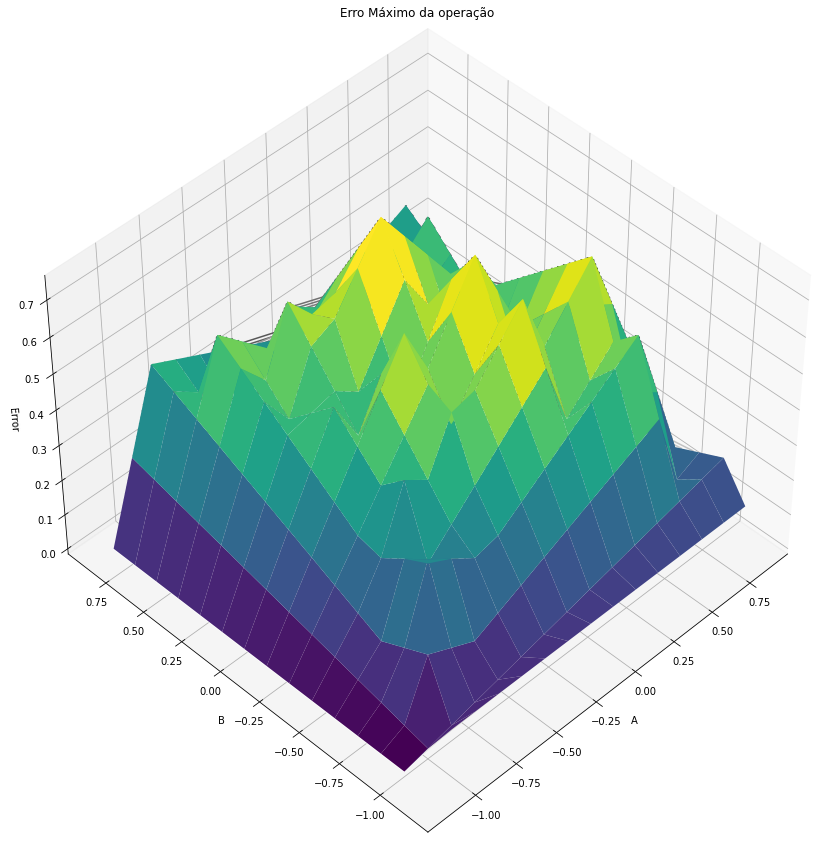

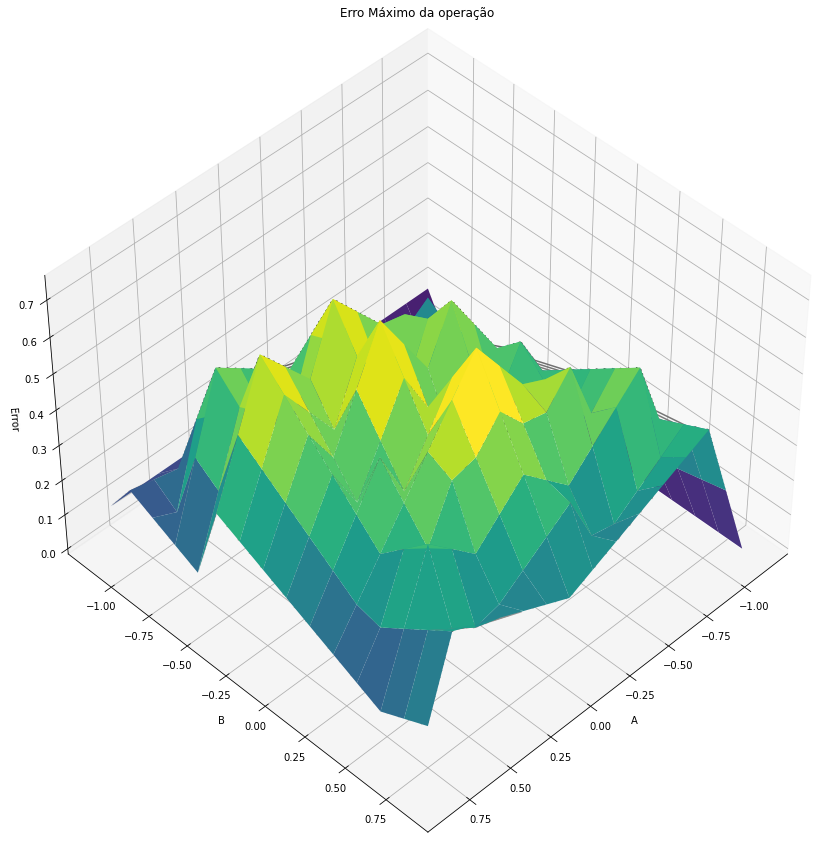

In [5]:
Z = np.loadtxt(max_error_operation)
a = np.arange(inicial_number, final_number, 1)
b = np.arange(inicial_number, final_number, 1)

X, Y = np.meshgrid(a, b)

X=X/(final_seed)
Y=Y/(final_seed)

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Error')
ax.set_title('Erro Máximo da operação')
ax.view_init(45, 225)        
plt.show()

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Error')
ax.set_title('Erro Máximo da operação')
ax.view_init(45, 45)        
plt.show()

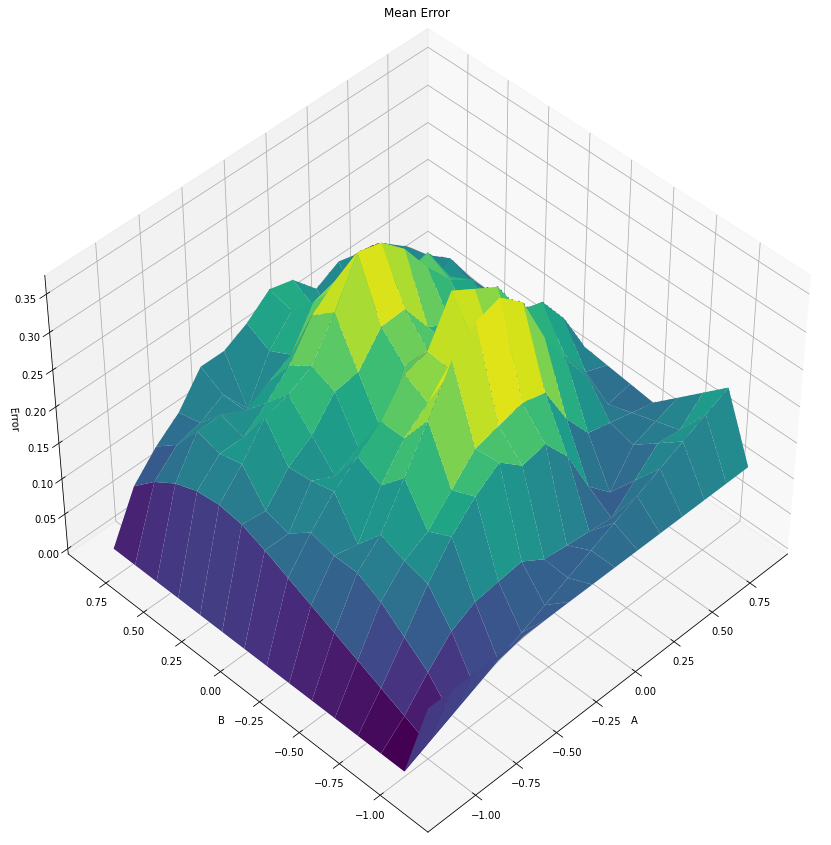

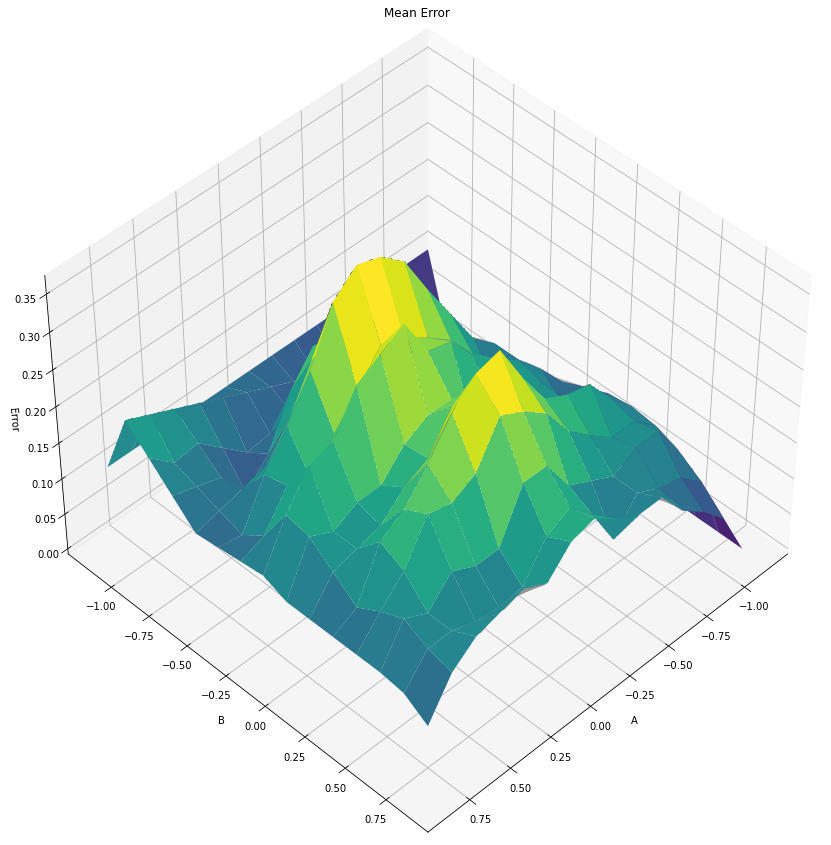

In [6]:
Z = np.loadtxt(mean_error_operation)
a = np.arange(inicial_number, final_number, 1)
b = np.arange(inicial_number, final_number, 1)

X, Y = np.meshgrid(a, b)

X=X/(final_seed)
Y=Y/(final_seed)

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Error')
ax.set_title('Mean Error')
ax.view_init(45, 225)        
plt.show()

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Error')
ax.set_title('Mean Error')
ax.view_init(45, 45)        
plt.show()

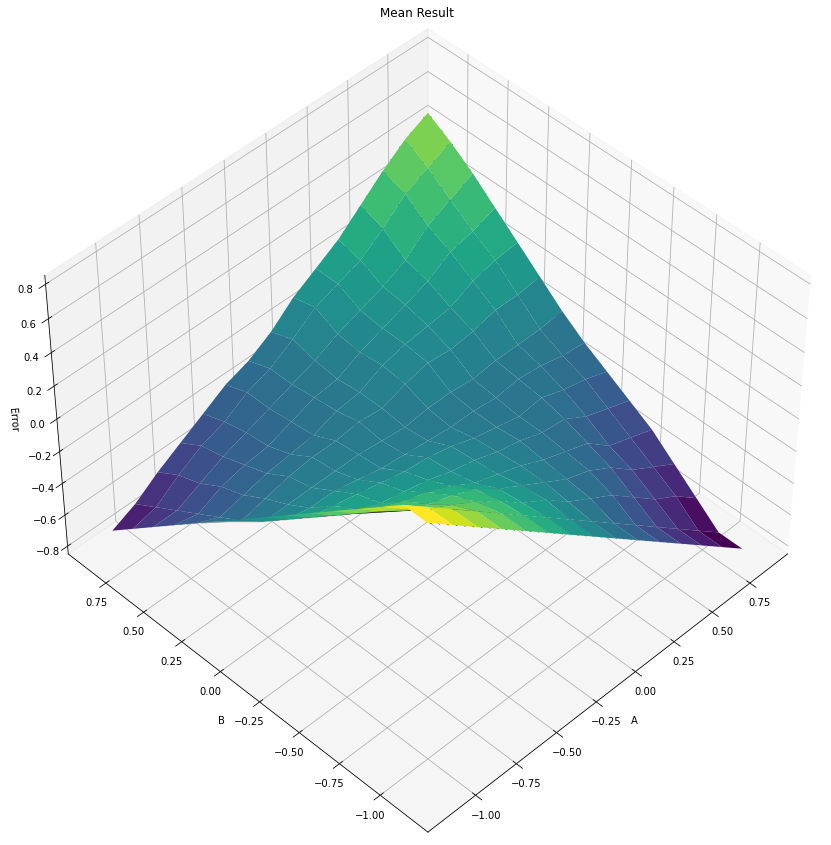

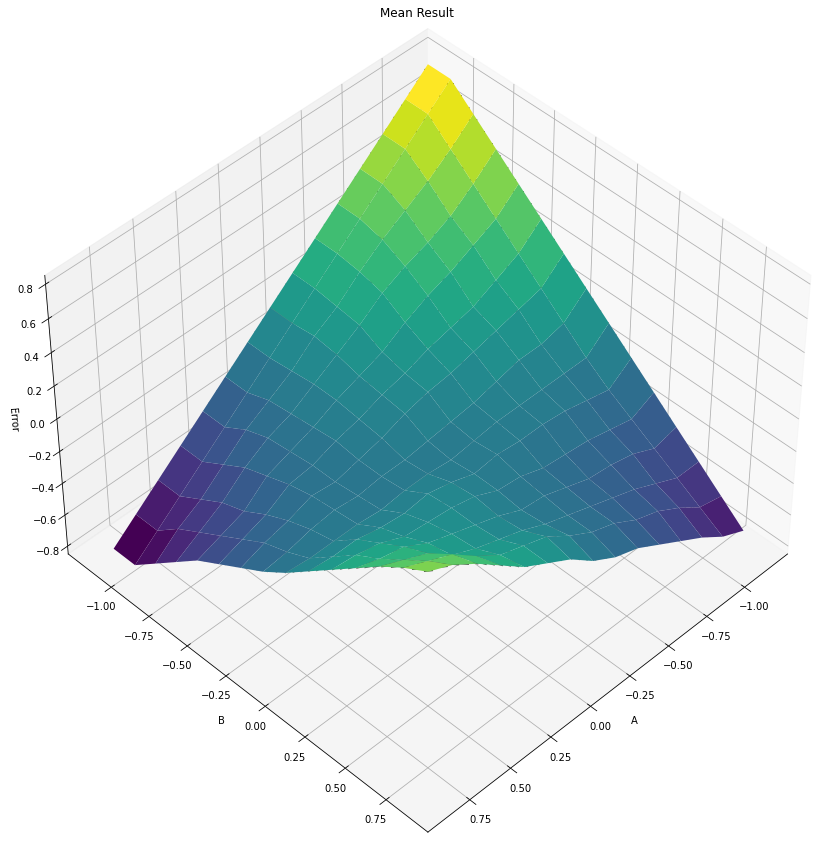

In [7]:
Z = np.loadtxt(mean_result_operation)
a = np.arange(inicial_number, final_number, 1)
b = np.arange(inicial_number, final_number, 1)

X, Y = np.meshgrid(a, b)

X=X/(final_seed)
Y=Y/(final_seed)

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Error')
ax.set_title('Mean Result')
ax.view_init(45, 225)        
plt.show()

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Error')
ax.set_title('Mean Result')
ax.view_init(45, 45)        
plt.show()